In [49]:
# Importing all necessary libraries
# munging imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# modeling imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initial Flights Delay Project Modeling

#### In this notebook, we will pull in data, sample some data points, and dummify the categorical variables for an initial model.

Pull in a sample from the final dataframe. 

In [41]:
#pull in a 10,000 datapoint sample from our dataframe, with unecessary columns dropped.
sample_df=pd.read_csv('/Users/mehikapatel/Flights_Project/Data/FinalFlightsData.csv').drop(columns=['Unnamed: 0','CRS_DEP_TIME','CRS_ARR_TIME','DEP_TIME','DEP_DELAY','ARR_DELAY','CANCELLED','DATE','FLIGHT_NUM','origin_lat','origin_lon','dest_lat','dest_lon','municipality1','municipality2']).sample(n=10000,random_state=42)

Fit an initial knn model with k=20 on sample data.

In [50]:
#make X and ys for simple MVP model (select out already numerical features)
    
    #attributes include: CRS_ELAPSED_TIME, DISTANCE, & holiday_szn

X = sample_df.drop(columns=['AIRLINE','ORIGIN','DEST','MONTH','DAYOFWEEK','origin_type','dest_type','DEP_HOUR','ARR_HOUR','origin_weather','origin_severity','dest_weather','dest_severity'])
y = sample_df.target

#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
# Train on training set, and Test on testing set
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8333333333333334


Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score

In [68]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)


[0.823 0.826 0.832 0.827 0.819 0.822 0.82  0.831 0.83  0.83 ]


In [56]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.8293999999999999, 0.841, 0.8263, 0.8333, 0.826, 0.8301999999999999, 0.8278999999999999, 0.8302999999999999, 0.8291000000000001, 0.8301999999999999, 0.8298, 0.8300000000000001, 0.8295999999999999, 0.8298, 0.8301000000000001, 0.8299, 0.8302999999999999, 0.8301999999999999, 0.8299999999999998, 0.8298, 0.8297000000000001, 0.8297000000000001, 0.8297000000000001, 0.8295, 0.8295999999999999, 0.8293999999999999, 0.8295, 0.8293999999999999, 0.8290999999999998, 0.8292999999999999]


In [66]:
max((k_scores))

#we get the maximum validation score with k = 1.

0.841

Text(0, 0.5, 'Cross-Validated Accuracy')

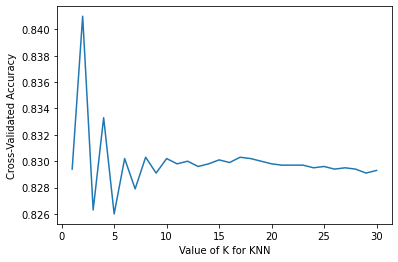

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
# Print confusion matrix for kNN
knn_confusion = confusion_matrix(y_test, knn.predict(X_test))

plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=sample_df['target'],
           yticklabels=sample_df['target'])

plt.xlabel('Predicted Delayed')
plt.ylabel('Actually Delayed')
plt.title('kNN confusion matrix');